# Aster Centering Analysis - Day 2
***
<i> Dmitrief, Turlier, De Labbey, Badaoui </i> </br>
<i> ENS - Active Matter  Workshop - Feb 15 </i>

In this notebook, we use Cytosim Analysis to analyze a Simulation where an Aster autonomously moves to the center.

## Imports

In [101]:
#Classic Import

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
import pandas as pd
import sys
import os 

#Cytolysis Import

from cytolysis import cytosim_analysis as ana

from aster import Aster_set
from tweezer import Tweezer_set
import methods

#from methods import distance, colin, total_force, total_individual_forces, tweezer_distance


In [102]:
#PARAMETERS

frame_step = 1 #1 frame of simulation corresponds to 1s

#PATH

from pathlib import Path
current_path = str(Path().absolute()) 
path_simu = current_path  + '/simu'

## <u> Vesicule Pulling </u>

Here, we would like to investigate an other possible mechanism based on pulling.  

For this example, we deal with motors which can bind both to cytoplasmic vesicules and microtubules. Thus, by binding to them, they can generate forces which could center the system.

### <i> <u> First Part - Colinear Force </u></i>

At first, we will a simplified modeling of vesicular pulling : we will model it as a force along the fiber, proportional to the fiber length to a power $p$.


```
set fiber microtubule
{
    rigidity = 20
    segmentation = 0.5
    confine = inside, 100
    activity = classic

    ...
    
    colinear_force           = 0.05, 1.0
    
}

```
Here $f=0.05 \times l^1$

**Q1. Run the simulation with the config file in `/simu/pulling/example_pulling_colinear` by using the `cytosim-sim` command:**

* `cytosim-play config.cym `

**Q2. Plot the distance to the center as a function of time. Is the aster centering ?**

An analysis function is provided bellow


In [ ]:
def cytosim_analysis_function(path_in):
    
    # REPORT FILES
    #Aster
    solid_file = path_in + "/force.txt" #Force for the Aster
    
    #Config
    config_file = path_in + "/config.cym" #Config File

    #Solid
    solids =   {"force": solid_file}
    solid_opts = {"type" : "solid" , "set" : Aster_set}

    # CREATE SIMULATION INSTANCE
    simul = ana.Simulation(solid_report={"core": solids},
                           solid_options=solid_opts,
                           config=config_file, dim=2)

    # ANALYSIS FUNCTION DECLARATION
    analyzer={"position": methods.position_x, 
              "total_force":methods.total_force_x, 
              } 

    # ANALYSIS
    simul.make_analysis(frame_analyzer=analyzer)
    analysis=simul.frames_analysis
    
    return analysis

### <i> <u> Second Part - With motors</u> </i>
<i>First, we will check the Position of The Aster</i>.

**Q1. Run the simulation with the config file in `/pulling/example_pulling` by using the `sim` command.**:

* `cytosim-sim config.cym `

**Q2. Report the characteristic of the Aster with the `report` command applied to:**

* ` cytosim-report aster:force > force.txt`
* ` cytosim-report aster:links > links.txt`

**Q3. Check the files consistency and use the `cytosim_analysis` package to analyze the report files(see below).**

*NB : You should get a Pandas DataFrame summarizing all the important quantitites.*

In [104]:
folder_test = '/pulling/example_pulling'

simul = cytosim_analysis_function(path_simu + folder_test)
df_analysis = simul.frames_analysis

distance_aster = df_analysis['position']

**Q4. Is the Aster Centering ?**
* **A. Plot the distance to the center with respect to the time and check the stability of it.**
* **B. You can help yourself with the `play` command on Cytosim.**

**C. If it is not centering, what do you suggest to permit it ?**

* Increase the number of motors ?

You can tweak the parameters on the `/pulling/example_pulling_centering/config.cym` file and restart !


#### <i> <u> Fixed Motors and Length - Centration  </u></i>

### <i> <u> Fourth Part - Force - Tweezer </u></i>
<i>One way to quantify te stability of the Aster Positionning is to measure the force with respect to the position, to conclude whether or not the position is a stable fixed point.
</i>

**Q6. Run the simulation with the config file in the folder `/simu/pulling/example_tweezer` with the `cytosim-sim` command**

**You can check that the Aster is indeed constrained to a defined position  with `cytosim-play`.**

**Q7. Report the position and force of the aster. Report the position of the tweezer with the following report command and compare with the position of the aster:**  

* `cytosim-report space:tweezer > tweezer.txt`  


In [113]:
def cytosim_analysis_function_tweezer(path_in):
    
    # REPORT FILES
    #Aster
    solid_file = path_in + "/force.txt" #Force for the Aster
    #Config
    config_file = path_in + "/config.cym" #Config File

    # DICTIONNARY
    #Solid
    solids =   {"force": solid_file}
    solid_opts = {"type" : "solid" , "set" : Aster_set}
    
   # RUN SIMUL
    simul = ana.Simulation(solid_report={"core": solids},
                           solid_options=solid_opts,
                           config=config_file, dim=2)
    
    # ANALYSIS FUNCTION DECLARATION
    analyzer={"position": methods.position_x,
              "total_force": methods.total_force_x}
    
    # ANALYSIS
    simul.make_analysis(frame_analyzer=analyzer)
    return simul 

In [114]:
simul_tweezer = cytosim_analysis_function_tweezer(path_simu + '/pulling/example_tweezer')
df_analysis_tweezer=simul_tweezer.frames_analysis


/home/magid/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


In [115]:
df_analysis_tweezer

id  distance           position          total_force  tweezer_distance
0      0  0.000000         [0.0, 0.0]          [0.0, -0.0]               2.0
1      1  1.978971   [1.9789, 0.0168]  [-48.0112, -3.8206]               2.0
2      2  2.016639   [2.0166, 0.0125]   [-15.3322, 2.4265]               2.0
3      3  2.000101  [2.0001, -0.0021]     [-2.4434, 5.908]               2.0
4      4  1.997304  [1.9973, -0.0038]     [-3.699, 0.0693]               2.0
..   ...       ...                ...                  ...               ...
196  196  1.987900  [1.9879, -0.0014]   [-9.1591, 13.6341]               2.0
197  197  1.998360   [1.9983, 0.0155]  [-9.0678, -13.2921]               2.0
198  198  2.003636    [2.0036, 0.012]   [-1.0937, -1.9854]               2.0
199  199  2.008101   [2.0081, 0.0015]   [-0.7099, -4.9663]               2.0
200  200  1.993926  [1.9939, -0.0102]   [-6.5296, -1.8195]               2.0

[201 rows x 5 columns]

**Q9. From the previous data, compute and plot the time-evolution and mean force and position of the aster along the X and Y axis and compare their values.**

To do so, we will use configuration templates and work in the `pulling_tweezers` directory with template `config_tpl.cym`:

Here we are directly going to play with the Tweezers to preciseley probe the Force-Position relationshop for an Aster centering thanks to vesicule pulling.

``` 
[[ x = [-4.75 + i/4 for i in range(39)]]]

set space tweezer
{
    shape = tweezer
}

new tweezer
{
    center = ( [[x]] 0 )
}
```

**Q9. In the folder `/simu/pulling/pulling_tweezers` follow these steps to generate config files, run simulations and report the aster, tweezer and link properties**  

* Generate the config files

  `.../../../python/run/preconfig.py config_.cym`
  

* Place in separated directories

  `mkdir config_files`  
  `mv config_00*.cym ./config_files`
  
* Get the executables here

  `cp ../../../bin/sim .`  
    
* Run simulations

  `.../../../python/run/go_sim.py /usr/local/bin/cytosim-sim ./config_files/config_00*.cym njobs=10`
  
* Report aster and tweezer properties

 `../../../python/look/scan.py 'cytosim-report aster:force > force.txt' run0*`  
 
 `../../../python/look/scan.py 'cytosim-report aster:links > links.txt' run0*` 
 
 `../../../python/look/scan.py 'cytosim-report space:tweezer > tweezer.txt' run0*`

**Q10. Loop over the runs and use `cytosim_analysis` to extract Force and Position**  

In [117]:
def cytosim_analysis_function_tweezer(path_in):
    
    # REPORT FILES
    #Aster
    solid_file = path_in + "/force.txt" #Force for the Aster
    #Config
    config_file = path_in + "/config.cym" #Config File

    # DICTIONNARY
    #Solid
    solids =   {"force": solid_file}
    solid_opts = {"type" : "solid" , "set" : Aster_set}
    
    # RUN SIMUL
    simul = ana.Simulation(solid_report={"core": solids},
                           solid_options=solid_opts,
                           config=config_file, dim=2)
    
    # ANALYSIS FUNCTION DECLARATION
    analyzer={"position": methods.position_x, 
              "total_force": methods.total_force_x}
    
    # ANALYSIS
    simul.make_analysis(frame_analyzer=analyzer)
    return simul 

In [120]:
path_pulling = path_simu + '/pulling/pulling_tweezers_fixed_motors/'
folders = os.listdir(path_pulling)[1:]
runs = [folder for folder in folders if folder.startswith("run0")]
print(runs)
simul_list = [cytosim_analysis_function_tweezer(path_pulling + run) for run in runs]
analysis_list = [simul.frames_analysis for simul in simul_list]

['run0026', 'run0009', 'run0032', 'run0020', 'run0017', 'run0024', 'run0005', 'run0012', 'run0011', 'run0000', 'run0016', 'run0007', 'run0019', 'run0028', 'run0030', 'run0006', 'run0036', 'run0013', 'run0027', 'run0008', 'run0022', 'run0004', 'run0029', 'run0021', 'run0037', 'run0003', 'run0035', 'run0015', 'run0002', 'run0031', 'run0023', 'run0018', 'run0025', 'run0033', 'run0014', 'run0010', 'run0001', 'run0034']


In [121]:

positions = [anali['position'] for anali in analysis_list]
forces = [anali['total_force'] for anali in analysis_list]

mean_pos_X = [np.mean(X) for X in positions]
mean_forces_X = [np.mean(force_X) for force_X in forces]
std_pos_X = [np.std(X) for X in positions]
std_forces_X = [np.std(force_X) for force_X in forces]


**Q11. Plot the force along X as a function of the assigned position of the Tweezer**

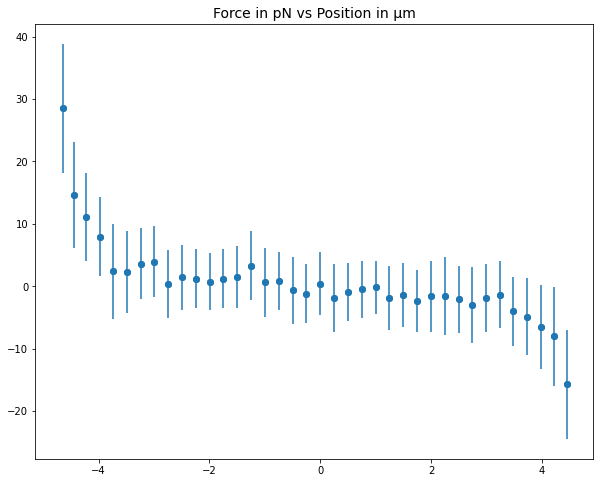

In [122]:
#PLOT FORCE VS POSITION ALONG X

plt.figure(figsize = (10,8))

plt.scatter(mean_pos_X,mean_forces_X)
plt.errorbar(mean_pos_X, mean_forces_X, yerr=std_forces_X, xerr= std_pos_X, fmt='o')
plt.title("Force in pN vs Position in µm",size = 14)
plt.show()


### Now do the same with Colinear forces

To do so, we will use configuration templates and work in the `colinear_tweezers` directory with template `config_tpl.cym`. An analysis function is provided below.


In [ ]:
def cytosim_analysis_function_tweezer(path_in):
    
    # REPORT FILES
    #Aster
    solid_file = path_in + "/force.txt" #Force for the Aster
    #Config
    config_file = path_in + "/config.cym" #Config File

    # DICTIONNARY
    #Solid
    solids =   {"force": solid_file}
    solid_opts = {"type" : "solid" , "set" : Aster_set}
    
    # RUN SIMUL
    simul = ana.Simulation(solid_report={"core": solids},
                           solid_options=solid_opts,
                           config=config_file, dim=2)
    
    # ANALYSIS FUNCTION DECLARATION
    analyzer={"position": methods.position_x, 
              "total_force": methods.total_force_x}
    
    # ANALYSIS
    simul.make_analysis(frame_analyzer=analyzer)
    return simu